In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# EDA

In [2]:
df=pd.read_csv('EV_population.csv')
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09
20816,February 28 2022,Island,WA,Passenger,744,350,"1,094","62,257","63,351",1.73
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,"2,724","2,740",0.58


In [3]:
days = list()
months = list()
years = list()
for x in df["Date"]:
  x_split = x.split()
  days.append(x_split[1])
  months.append(x_split[0])
  years.append(x_split[2])

In [4]:
df["year"]= years
df["month"]=months
df["day"]=days

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
 10  year                              

In [6]:
df["Battery Electric Vehicles (BEVs)"] = pd.to_numeric(df["Battery Electric Vehicles (BEVs)"].str.replace(",","").str.replace(".",""),errors='coerce')

df["Plug-In Hybrid Electric Vehicles (PHEVs)"] = pd.to_numeric(df["Plug-In Hybrid Electric Vehicles (PHEVs)"].str.replace(",","").str.replace(".",""),errors='coerce')

df["Electric Vehicle (EV) Total"] = pd.to_numeric(df["Electric Vehicle (EV) Total"].str.replace(",","").str.replace(".",""),errors='coerce')

df["Non-Electric Vehicle Total"] = pd.to_numeric(df["Non-Electric Vehicle Total"].str.replace(",", "").str.replace(".",""), errors='coerce')

df["Total Vehicles"] = pd.to_numeric(df["Total Vehicles"].str.replace(",", "").str.replace(".",""), errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  int64  
 6   Electric Vehicle (EV) Total               20819 non-null  int64  
 7   Non-Electric Vehicle Total                20819 non-null  int64  
 8   Total Vehicles                            20819 non-null  int64  
 9   Percent Electric Vehicles                 20819 non-null  float64
 10  year                              

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery Electric Vehicles (BEVs),20819.0,217.516211,2278.533317,0.0,0.00,1.00,3.000,72333.0
Plug-In Hybrid Electric Vehicles (PHEVs),20819.0,80.063644,646.373208,0.0,0.00,1.00,2.000,17501.0
Electric Vehicle (EV) Total,20819.0,297.579855,2915.504792,0.0,1.00,1.00,4.000,89834.0
Non-Electric Vehicle Total,20819.0,25098.062539,106732.436167,0.0,43.00,163.00,8380.000,1399823.0
Total Vehicles,20819.0,25395.642394,109085.962150,1.0,44.00,165.00,8421.500,1430937.0
Percent Electric Vehicles,20819.0,4.139216,11.055350,0.0,0.39,1.22,2.995,100.0


In [9]:
groupby_county = df.groupby("County").agg({"Electric Vehicle (EV) Total":"sum","Total Vehicles":"sum"})

groupby_county["Electric Vehicle Ratio"] = groupby_county["Electric Vehicle (EV) Total"]/groupby_county["Total Vehicles"]

(groupby_county)

,Electric Vehicle (EV) Total,Total Vehicles,Electric Vehicle Ratio
County,,,
Ada,98,15408,0.006360
Adams,1758,1554217,0.001131
Alameda,322,23748,0.013559
Albemarle,118,1846,0.063922
Alexandria,175,7434,0.023540
...,...,...,...
Yavapai,25,766,0.032637
Yellowstone,24,430,0.055814
Yolo,12,252,0.047619


In [10]:
groupby_county["County"]=groupby_county.index

In [11]:
groupby_county

,Electric Vehicle (EV) Total,Total Vehicles,Electric Vehicle Ratio,County
County,,,,
Ada,98,15408,0.006360,Ada
Adams,1758,1554217,0.001131,Adams
Alameda,322,23748,0.013559,Alameda
Albemarle,118,1846,0.063922,Albemarle
Alexandria,175,7434,0.023540,Alexandria
...,...,...,...,...
Yavapai,25,766,0.032637,Yavapai
Yellowstone,24,430,0.055814,Yellowstone
Yolo,12,252,0.047619,Yolo


In [12]:
EV = df.groupby('County').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Percent Electric Vehicles' : 'mean',
    'Vehicle Primary Use': lambda x: x.mode().iloc[0]
}).reset_index()

EV

,County,Electric Vehicle (EV) Total,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Percent Electric Vehicles,Vehicle Primary Use
0,Ada,98,40,58,15310,0.808281,Passenger
1,Adams,1758,1074,684,1552459,0.577806,Passenger
2,Alameda,322,247,75,23426,1.596163,Passenger
3,Albemarle,118,107,11,1728,6.967895,Passenger
4,Alexandria,175,163,12,7259,2.597742,Passenger
...,...,...,...,...,...,...,...
306,Yavapai,25,1,24,741,3.676000,Passenger
307,Yellowstone,24,0,24,406,6.325417,Passenger
308,Yolo,12,12,0,240,4.842500,Passenger
309,York,27,27,0,2132,1.276667,Passenger


# **Top 10 EV by County**

# Ratio

<Axes: title={'center': 'Top 10 EV ratio by County'}, xlabel='County', ylabel='Electric Vehicle Ratio'>

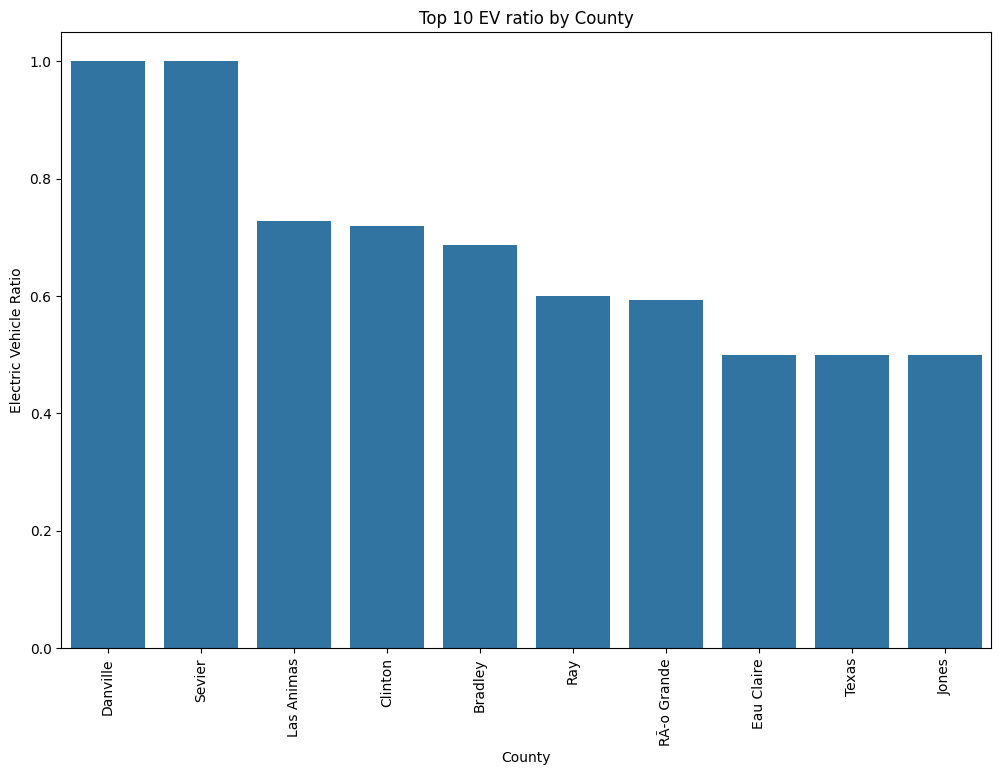

In [13]:
groupby_county=groupby_county.sort_values(by="Electric Vehicle Ratio",ascending=False)

plt.figure(figsize=(12,8))
plt.title("Top 10 EV ratio by County")
plt.xticks(rotation=90)
sns.barplot(groupby_county.head(10),x='County',y='Electric Vehicle Ratio')

# Percentage

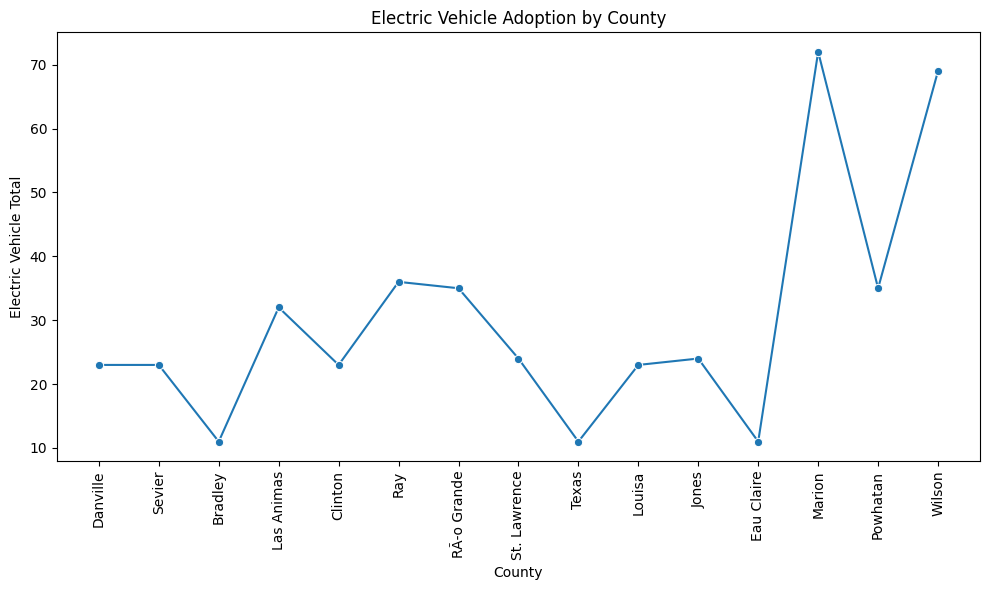

In [14]:
sort_byCounty = EV.sort_values(by='Percent Electric Vehicles', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.lineplot(data=sort_byCounty, x='County',y='Electric Vehicle (EV) Total', marker='o')
plt.xlabel('County')
plt.ylabel('Electric Vehicle Total')
plt.title('Electric Vehicle Adoption by County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **EV Ratio by Year**

In [15]:
groupby_year=df.groupby("year").agg({"Electric Vehicle (EV) Total":"sum","Total Vehicles":"sum"})

groupby_year["year"]=groupby_year.index

In [16]:
groupby_year

,Electric Vehicle (EV) Total,Total Vehicles,year
year,,,
2017,304741,71654083,2017
2018,416635,72773658,2018
2019,577980,74127191,2019
2020,715810,74596710,2020
2021,914806,75177880,2021
2022,1214793,74538471,2022
2023,1705405,73832146,2023
2024,345145,12011740,2024


In [17]:
groupby_year["Electric Vehicle (EV) Ratio"]=groupby_year["Electric Vehicle (EV) Total"]/groupby_year["Total Vehicles"]

groupby_year

,Electric Vehicle (EV) Total,Total Vehicles,year,Electric Vehicle (EV) Ratio
year,,,,
2017,304741,71654083,2017,0.004253
2018,416635,72773658,2018,0.005725
2019,577980,74127191,2019,0.007797
2020,715810,74596710,2020,0.009596
2021,914806,75177880,2021,0.012169
2022,1214793,74538471,2022,0.016298
2023,1705405,73832146,2023,0.023098
2024,345145,12011740,2024,0.028734


<Axes: title={'center': 'Electric Vehicle Ratio by year'}, xlabel='year', ylabel='Electric Vehicle (EV) Ratio'>

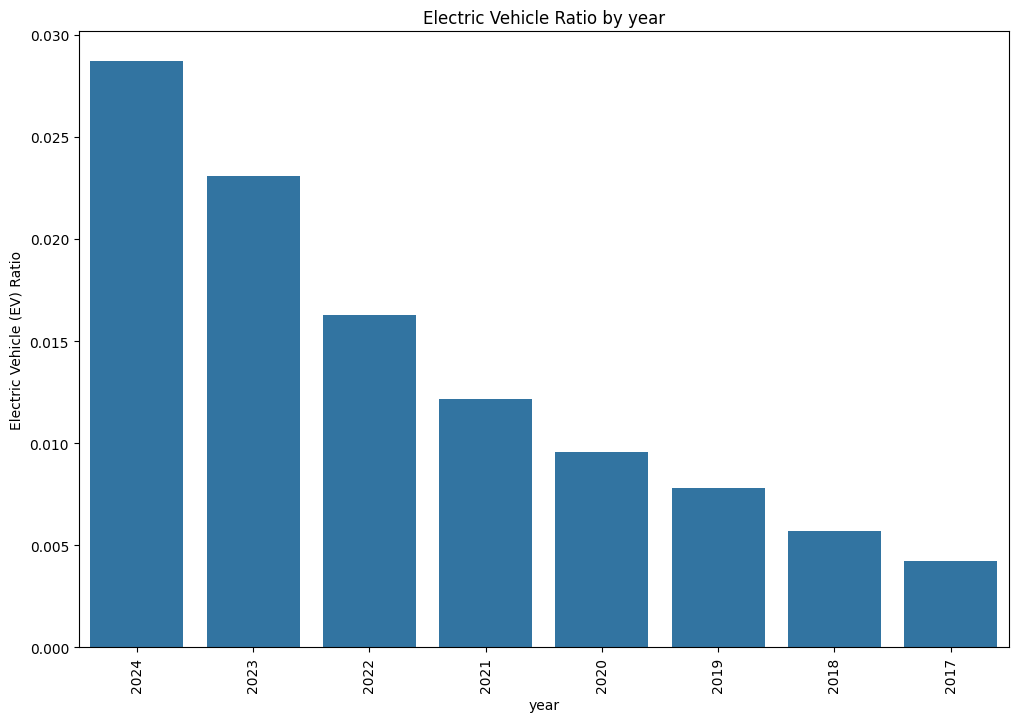

In [18]:
groupby_year = groupby_year.sort_values(by="Electric Vehicle (EV) Ratio",ascending=False)

plt.figure(figsize=(12,8))
plt.title("Electric Vehicle Ratio by year")
plt.xticks(rotation=90)
sns.barplot(groupby_year,x="year",y="Electric Vehicle (EV) Ratio")

In [19]:
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,day
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50,2022,September,30
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57,2022,December,31
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03,2020,January,31
3,June 30 2022,Ferry,WA,Truck,0,0,0,3575,3575,0.00,2022,June,30
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19,2021,July,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67,2023,January,31
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09,2020,July,31
20816,February 28 2022,Island,WA,Passenger,744,350,1094,62257,63351,1.73,2022,February,28
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,2724,2740,0.58,2020,December,31


# **Electric Vehicle usage by Year,Vehicle**

In [20]:
passenger = df[df['Vehicle Primary Use'] == 'Passenger']
truck = df[df['Vehicle Primary Use']== 'Truck']

In [21]:
passenger = passenger.groupby('year').agg({'Electric Vehicle (EV) Total':'sum'})
passenger

,Electric Vehicle (EV) Total
year,
2017,304566
2018,416469
2019,577826
2020,715649
2021,914636
2022,1210920
2023,1684806
2024,339776


In [22]:
truck = truck.groupby('year').agg({'Electric Vehicle (EV) Total':'sum'})
truck

,Electric Vehicle (EV) Total
year,
2017,175
2018,166
2019,154
2020,161
2021,170
2022,3873
2023,20599
2024,5369


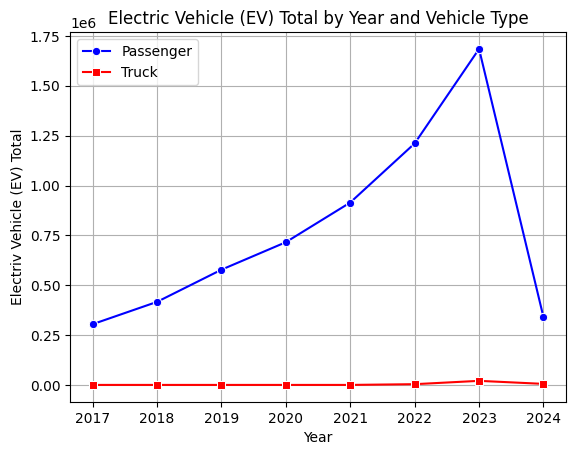

In [23]:
sns.lineplot(data=passenger,x='year',y='Electric Vehicle (EV) Total', label='Passenger',marker ='o', color='blue')

sns.lineplot(data=truck,x='year',y='Electric Vehicle (EV) Total', label='Truck',marker ='s', color='red')

plt.title('Electric Vehicle (EV) Total by Year and Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Electriv Vehicle (EV) Total')

plt.legend()
plt.grid()
plt.show()


In [24]:
df['Vehicle Primary Use'] = df['Vehicle Primary Use'].map({'Passenger': 1,'Truck' : 0})

# **Pie Chart representation of BEVs and PHEVs**

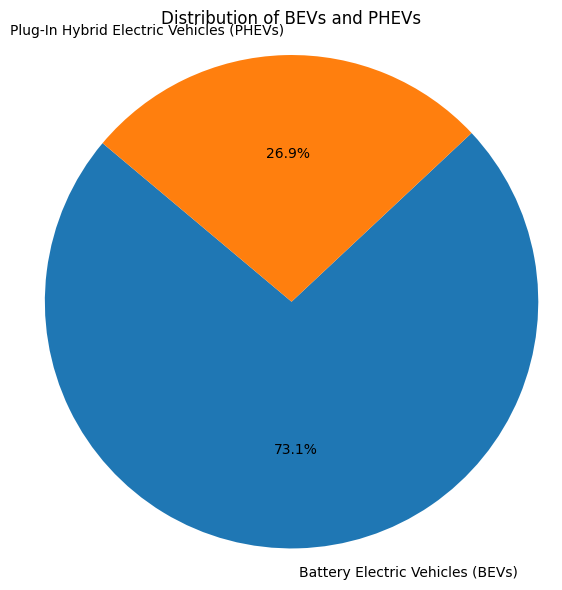

In [25]:
plt.figure(figsize=(6,6))
labels=['Battery Electric Vehicles (BEVs)','Plug-In Hybrid Electric Vehicles (PHEVs)']
sizes = [EV['Battery Electric Vehicles (BEVs)'].sum(), EV['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle = 140)
plt.title('Distribution of BEVs and PHEVs')
plt.axis('equal')
plt.tight_layout()
plt.show()